In [30]:
import os
%pwd

'd:\\Masters\\Fall_23'

In [31]:
os.chdir("../")

In [32]:
import pandas as pd
data = pd.read_csv("artifacts/data_ingestion/supply_chain_data.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'artifacts/data_ingestion/supply_chain_data.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14  location                 10

In [ ]:
data.isnull().sum()

product_type               0
sku                        0
price                      0
availability               0
number_of_products_sold    0
revenue_generated          0
customer_demographics      0
stock_levels               0
lead_times                 0
order_quantities           0
shipping_times             0
shipping_carriers          0
shipping_costs             0
supplier_name              0
location                   0
lead_time                  0
production_volumes         0
manufacturing_lead_time    0
manufacturing_costs        0
inspection_results         0
defect_rates               0
transportation_modes       0
routes                     0
costs                      0
dtype: int64

In [ ]:
data.describe()

,price,availability,number_of_products_sold,revenue_generated,stock_levels,lead_times,order_quantities,shipping_times,shipping_costs,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,defect_rates,costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [ ]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
data.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
data

,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,order_quantities,...,location,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [ ]:
data.shape

(100, 24)

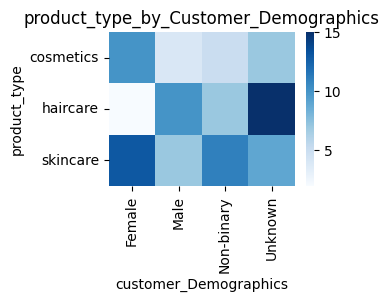

In [35]:
# create a heatmap of customer demographics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3,2))
sns.heatmap(pd.crosstab(data['product_type'], data['customer_demographics']), cmap='Blues')
plt.xlabel('customer_Demographics')
plt.ylabel('product_type')
plt.title('product_type_by_Customer_Demographics')

plt.show()

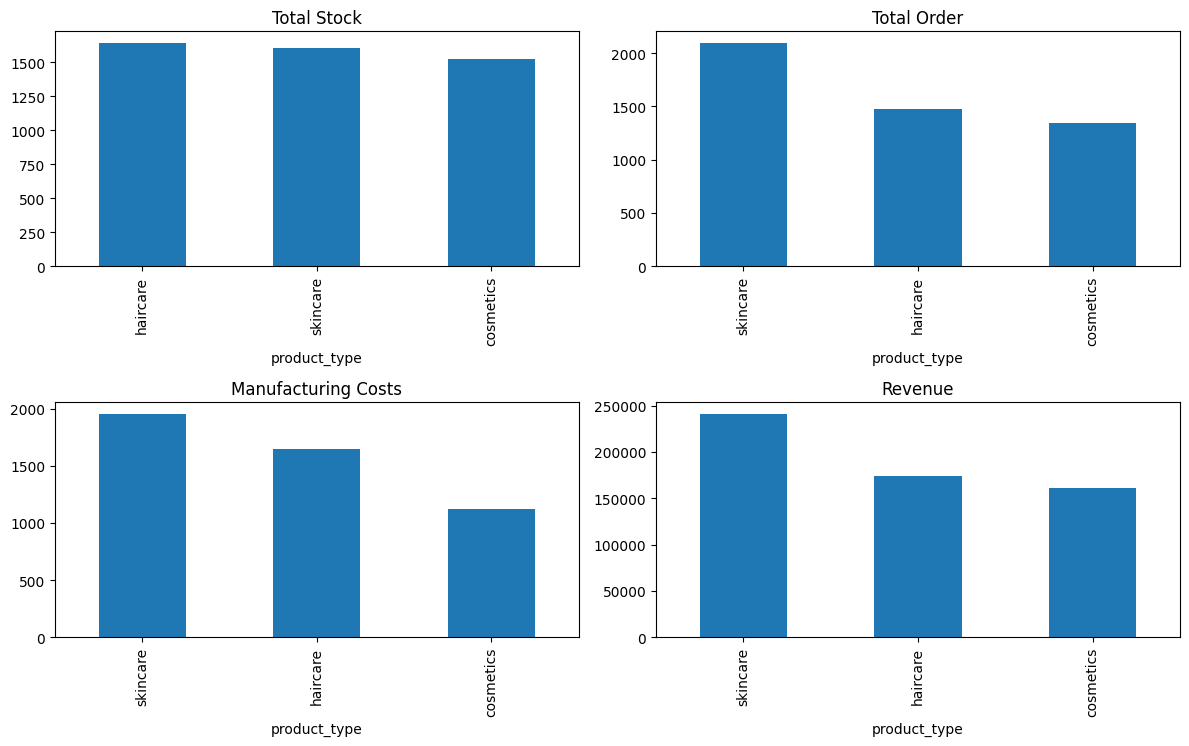

In [39]:
import plotly.express as px
Product = data.groupby('product_type')
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Product['stock_levels'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Stock")

plt.subplot(4, 2, 2)
Product['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Product['manufacturing_costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Manufacturing Costs")

plt.subplot(4, 2, 4)
Product['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.tight_layout()
plt.show()

data_Products=data.groupby(['product_type'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Products, values='number_of_products_sold', names= 'product_type' , title= 'Total Number of Products Sold', 
       color='product_type',
             color_discrete_map={'cosmetics':'skyblue',
                                 'haircare':'navajowhite',
                              'skincare':'lawngreen'})

<Figure size 1200x800 with 0 Axes>

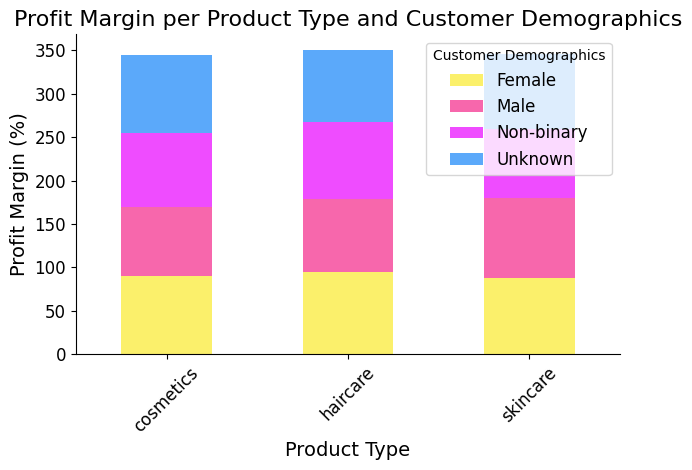

In [49]:
# Calculate the total cost for each entry
data['total_cost'] = data['shipping_costs'] + data['manufacturing_costs'] + data['costs']

# Calculate the profit for each entry
data['profit'] = data['revenue_generated'] - data['total_cost']

# Calculate profit margins
data['profit_margin'] = (data['profit'] / data['revenue_generated']) * 100

# Group the data by 'Product_Type' and 'Customer_demographics' and calculate the mean of 'Profit Margin'
grouped_profit_margin = data.groupby(['product_type', 'customer_demographics'])['profit_margin'].mean().unstack()

# Set the neon_palette color palette
neon_palette = ["#faeb2c", "#f52789", "#e900ff", "#1685f8", "#3d144c"]
sns.set_palette(neon_palette)

# Plotting the stacked bar chart with Seaborn
plt.figure(figsize=(12, 8))
ax = grouped_profit_margin.plot(kind='bar', stacked=True, alpha=0.7)
plt.title('Profit Margin per Product Type and Customer Demographics', fontsize=16)
plt.xlabel("Product Type", fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Customer Demographics", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [43]:
#supply chain risk assessment
risk_data = data[['sku', 'lead_times', 'stock_levels']]
risk_data.head()

#risk score assigned
risk_data['Risk score'] = risk_data['lead_times'] * (1-risk_data.loc[:,'stock_levels'])

# Sort the risk_data by 'Risk score' in descending order and select top 10 highest-risk data
risk_data = risk_data.sort_values(by='Risk score', ascending=False)[:10]

# Create a bar plot using Plotly Express
fig = px.bar(risk_data, x='sku', y='Risk score', title='Top 10 Highest-Risk Data',
             labels={'Risk score': 'Risk Score', 'sku': 'sku'},
             text='Risk score')

# Customize the appearance of the plot
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='sku', yaxis_title='Risk Score', title_x=0.5)

# Show the plot
fig.show()

C:\Users\CSE_IT\AppData\Local\Temp\ipykernel_26208\2513162518.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
#Inventory Optimization Analysis with EOQ (economic order quantity)
import numpy as np

# we assume for holding cost 0.2
holdingcost = 0.2

def calculate_eoq(data):
    S = data['costs']
    D = data['number_of_products_sold'] 
    H = data['number_of_products_sold'] * holdingcost
    EOQ = np.sqrt((2*S*D)/H)
    return round(EOQ)

data['EOQ'] = calculate_eoq(data)

comparison_columns = data[['sku', 'EOQ','order_quantities']]
comparison_columns.head()

# Extracting the top 10 rows for comparison
top_10_comparison = comparison_columns.head(10)

# Creating a bar plot to compare EOQ and Order Quantities for the top 10 SKUs
fig = px.bar(top_10_comparison, x='sku', y=['EOQ', 'order_quantities'], 
             title='Comparison of EOQ and Order Quantities for Top 10 SKUs')

fig.update_layout(
    title_x=0.5
)

# Displaying the plot
fig.show()

In [50]:
# Lead times optimization analysis
avg_lead_times_transport = data.groupby(['transportation_modes'])['lead_times'].mean().reset_index()

fig = px.bar(avg_lead_times_transport, x='transportation_modes', y='lead_times',
             labels={'transportation_modes': 'transportation_mode', 'lead_times': 'average_lead_time'},
             title='Average Lead Times by Transportation Mode')

# Customize the color scale for bars
color_scale = px.colors.qualitative.Set3  
fig.update_traces(marker_color=color_scale)

# Customize the layout for beautification
fig.update_layout(
    title=dict(text='Average Lead Times by Transportation Mode', x=0.5),
    xaxis_title='transportation_mode',
    yaxis_title='average_lead_time',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    font=dict(family="Arial", size=14),
    showlegend=False  # Remove legend
)

# Show the plot
fig.show()

best_transportation_mode = avg_lead_times_transport.loc[avg_lead_times_transport['lead_times'].idxmin()]
print(best_transportation_mode)

transportation_modes          Sea
lead_times              12.176471
Name: 3, dtype: object


Text(0.5, 0, 'Supplier Name')

<Figure size 1000x600 with 0 Axes>

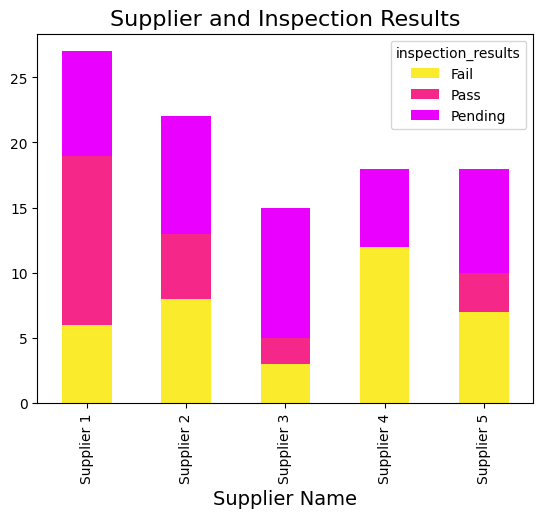

In [51]:
#supplier inspection analysis

# Select relevant columns
selected_columns_inspection = ['supplier_name', 'inspection_results']
data_subset_inspection = data[selected_columns_inspection]

# Group the data by 'Supplier_name' and 'Inspection_results' and calculate the count
grouped_inspection = data_subset_inspection.groupby(['supplier_name', 'inspection_results']).size().unstack()

# Set the neon_palette color palette
neon_palette = ["#faeb2c", "#f52789", "#e900ff", "#1685f8", "#3d144c"]
sns.set_palette(neon_palette)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
ax = grouped_inspection.plot(kind='bar', stacked=True)
plt.title('Supplier and Inspection Results', fontsize=16)
plt.xlabel('Supplier Name', fontsize=14)

<Axes: >

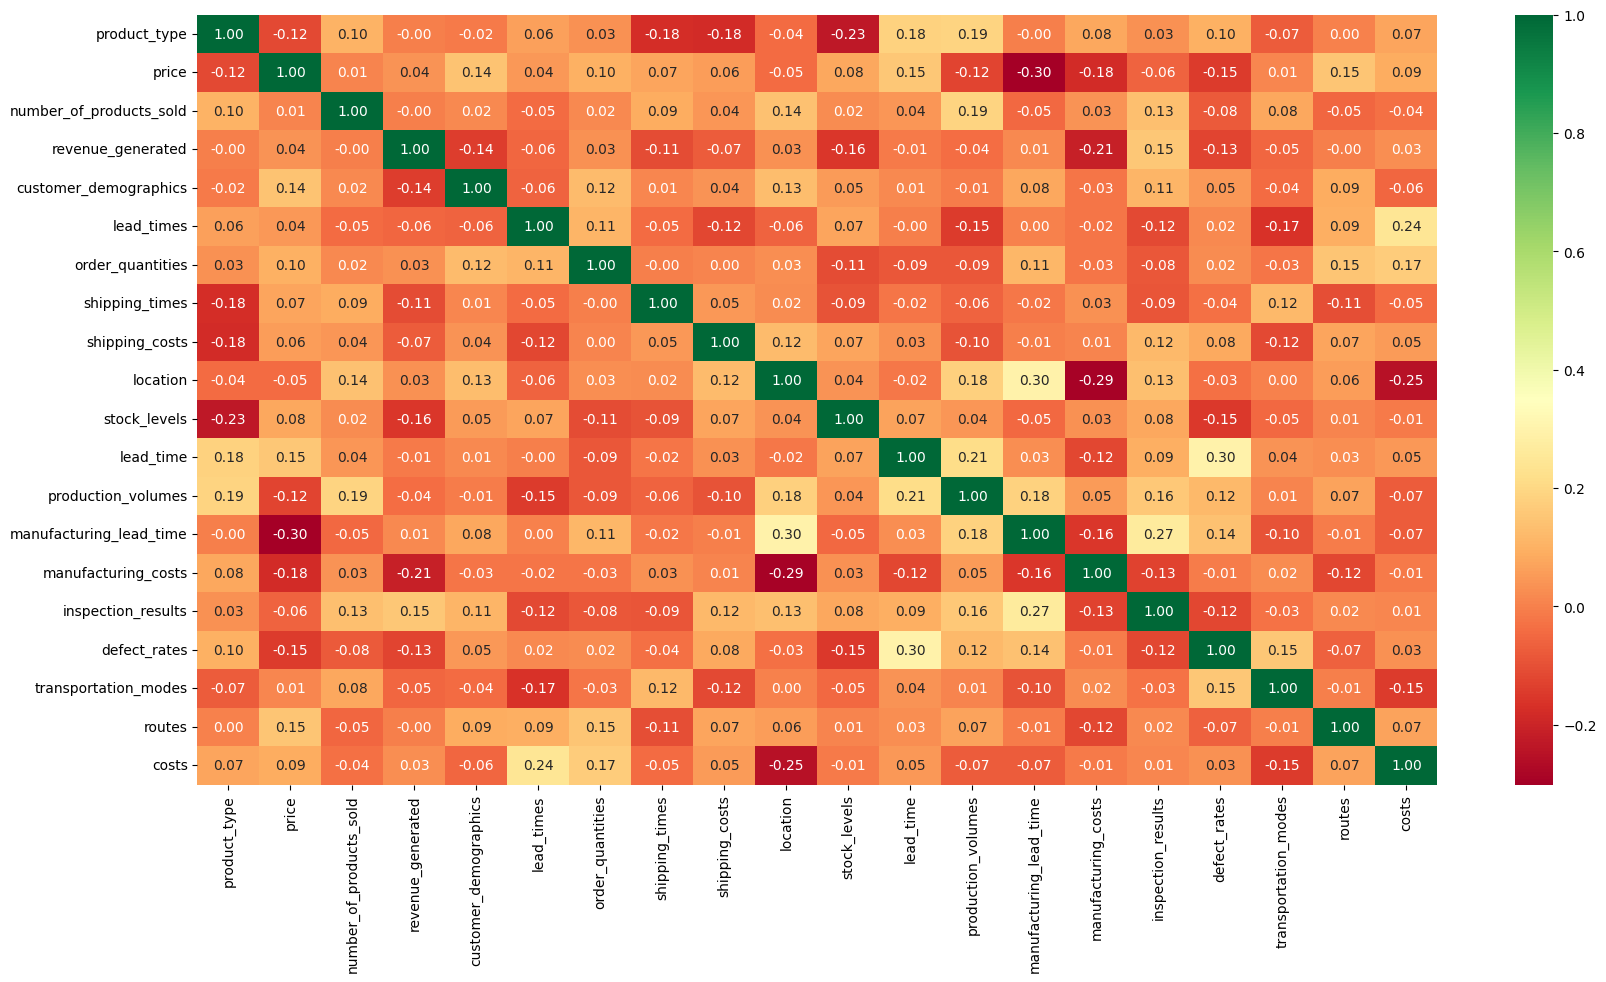

In [54]:
#make a corr matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

MP_SC = data.copy()

#convert the categorical columns into numeric
le = preprocessing.LabelEncoder()
MP_SC['product_type']= le.fit_transform(MP_SC['product_type'])
MP_SC['customer_demographics']= le.fit_transform(MP_SC['customer_demographics'])
MP_SC['shipping_carriers']= le.fit_transform(MP_SC['shipping_carriers'])
MP_SC['location']= le.fit_transform(MP_SC['location'])
MP_SC['sku']= le.fit_transform(MP_SC['sku'])
MP_SC['inspection_results']= le.fit_transform(MP_SC['inspection_results'])
MP_SC['transportation_modes']= le.fit_transform(MP_SC['transportation_modes'])
MP_SC['routes']= le.fit_transform(MP_SC['routes'])
MP_SC['supplier_name']= le.fit_transform(MP_SC['supplier_name'])


SC_features=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(SC_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

In [132]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [133]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [135]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):
        print(1)
        self.config = read_yaml(config_filepath)
        print(2)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [136]:
print(CONFIG_FILE_PATH)

config\config.yaml


In [137]:
import os
from mlProject import logger

class DataValidation:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e

In [ ]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValidation(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e